# WINE QUALITY ESTIMATION PROJECT

## Problem Statement
Use machine learning to determine which physiochemical properties make a wine 'good'!

## About dataset features
### fixed acidity

The predominant fixed acids found in wines are tartaric, malic, citric, and succinic.  Their respective levels found in wine can vary greatly but in general one would expect to see 1,000 to 4,000 mg/L tartaric acid, 0 to 8,000 mg/L malic acid, 0 to 500 mg/L citric acid, and 500 to 2,000 mg/L succinic acid.  All of these acids originate in grapes with the exception of succinic acid, which is produced by yeast during the fermentation process.  Grapes also contain ascorbic acid (Vitamin C), but this is lost during fermentation.  It is also legal to add fumaric acid as a preservative.

Currently winemakers in California  are pushing wines to high pH levels, as high as 4.0, while 20 years ago pH's above 3.6 were unusual.  This makes wines taste softer, popular with wine writers today.

### volatile acidity

Volatile acidity (VA) is a measure of the wine's volatile (or gaseous) acids. The primary volatile acid in wine is acetic acid, which is also the primary acid associated with the smell and taste of vinegar. However, commercial vinegars have a concentration of 3 to 9 percent acetic acid (30 to 90 grams per liter, g/L), which is 30 to 90 times the allowable levels in wine.

Volatile acidity concentration is regulated by the federal Tax and Trade Bureau, and allowable levels for various wine styles can be found in the Code of Federal Regulations (CFR). In general, per the CFR: "The maximum volatile acidity, calculated as acetic acid and exclusive of sulfur dioxide, is 0.14 g/100 mL for red wine and 0.12 g/100 mL for white wines." This is equivalent to 1.4 and 1.2 g/L acetic acid for red and white wines, respectively.

### citric acid

Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor. The disadvantage of adding citric acid is its microbial instability. Since bacteria use citric acid in their metabolism, it may increase the growth of unwanted microbes. Often to increase acidity of wine, winemakers will add tartaric acid instead.

### residual sugar

Residual Sugar, or RS for short, refers to any natural grape sugars that are leftover after fermentation ceases (whether on purpose or not). The juice of wine grapes starts out intensely sweet, and fermentation uses up that sugar as the yeasts feast upon it.

### chlorides

The amount of chloride in wine is influenced by both the terroir and type of grape, and the importance of quantification lies in the fact that wine flavor is strongly impacted by this particular ion, which, in high concentration, gives the wine an undesirable salty taste and significantly decreases its market appeal. Quantification also helps determining wine origin and different grape varieties used in the wine, thus justifying the difference in wine regulations from country to country.

### free sulfur dioxide

SO2 that is present in wine but has not yet reacted is considered “free.” Free SO2 is what is still available to protect the wine. Be particularly attentive to the amount used , and this is the last addition that can be performed.

### total sulfur dioxide

Simply put, Total Sulfur Dioxide (TSO2) is the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars. Simply put, Total Sulfur Dioxide (TSO2) is the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars.

### density

The typical density or specific gravity of the must (the term we give to wine before we add or pitch the yeast) is generally between 1.080 and 1.090. This essentially means your wine is 8-9% more dense than water. One of the most important parameters in wine production is the sugar content of the grapes. Accurately determining this value is crucial to deciding when to harvest for the highest quality wine.

### pH

Typically, the pH level of a wine ranges from 3 to 4. Red wines with higher acidity are more likely to be a bright ruby color, as the lower pH gives them a red hue. Higher pH, less-acidic red wines can take on a blue or purple hue.

Acidity is an essential component of any wine's profile, and it greatly influences overall perception. “If the pH is higher, the wine will be softer and rounder, and if the pH is lower, it will feel more linear,” says Cadamatre.

### sulphates

Added sulfites preserve freshness and protect wine from oxidation, and unwanted bacteria and yeasts. Without added sulfites, a 1961 Bordeaux would be considered trash vinegar rather than a treasure.
A well made dry red wine typically has about 50 mg/l sulfites. Wines with lower acidity need more sulfites than higher acidity wines. Wines with more color (i.e., red wines) tend to need less sulfites than clear wines (i.e., white wines).

### alcohol

Wine can have anywhere between 5% and 23% ABV. The average alcohol content of wine is about 12%. This amount varies depending on the variety of wine, as well as the winemaker and their desired ABV. Some wines within the same family can even see differences in the alcohol content due to the location of the vineyard and winery.

### quality
This is the target variable to be estimated (predicted). It is a numeric figure that shows the quality of the wine ranging from 0 being very poor to 10 being very good.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Performing Exploratory Data Analysis (EDA) on the data set

In [2]:
# importing the data to notebook
wine_dataframe = pd.read_csv('../data/wine-model-training-data.csv')
# displaying the first five rows of the dataframe
wine_dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.14,0.34,1.3,0.055,50.0,153.0,0.99450,3.29,0.80,9.6,6.0
1,6.8,0.32,0.32,8.7,0.029,31.0,105.0,0.99146,3.00,0.34,12.3,7.0
2,7.5,0.28,0.34,4.2,0.028,36.0,116.0,0.99100,2.99,0.41,12.3,8.0
3,6.5,0.24,0.32,7.6,0.038,48.0,203.0,0.99580,3.45,0.54,9.7,7.0
4,6.9,0.21,0.62,6.3,0.042,7.0,109.0,0.99358,2.96,0.59,10.2,6.0


In [3]:
# data info.
wine_dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000
mean,6.855261,0.278129,0.334396,6.453543,0.045880,35.482705,138.786332,0.994053,3.188751,0.490110,10.512357,5.877732
std,0.847440,0.101028,0.120258,5.111890,0.022191,17.151113,42.442138,0.003014,0.150602,0.113939,1.234535,0.885676
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,9.000000,0.987110,2.720000,0.230000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,109.000000,0.991755,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.300000,0.043000,34.000000,134.000000,0.993800,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,10.000000,0.050000,46.000000,168.000000,0.996200,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.060000,14.200000,9.000000


In [4]:
# displaying the number of unique values of columns
for s in wine_dataframe.columns:
    l = len(wine_dataframe[s].value_counts())
    print(s,":", l)

fixed acidity : 68
volatile acidity : 120
citric acid : 85
residual sugar : 299
chlorides : 152
free sulfur dioxide : 129
total sulfur dioxide : 243
density : 844
pH : 100
sulphates : 76
alcohol : 101
quality : 7


In [5]:
# avalable qualities in dataset
unique_qualities = (wine_dataframe.quality.unique())
unique_qualities

array([6., 7., 8., 5., 4., 3., 9.])

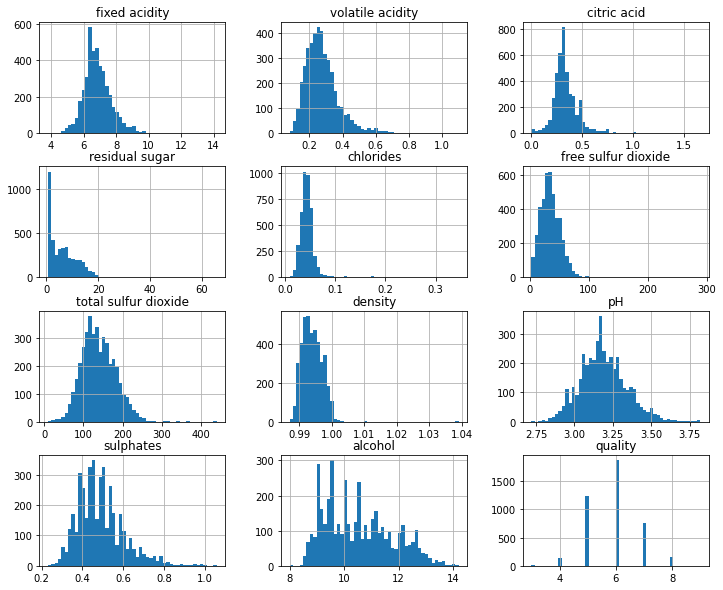

In [6]:
# the distribution of the data
wine_dataframe.hist(figsize=(12, 10), bins=50);

Outliers present. could be columns with little number of samples or obsearvation

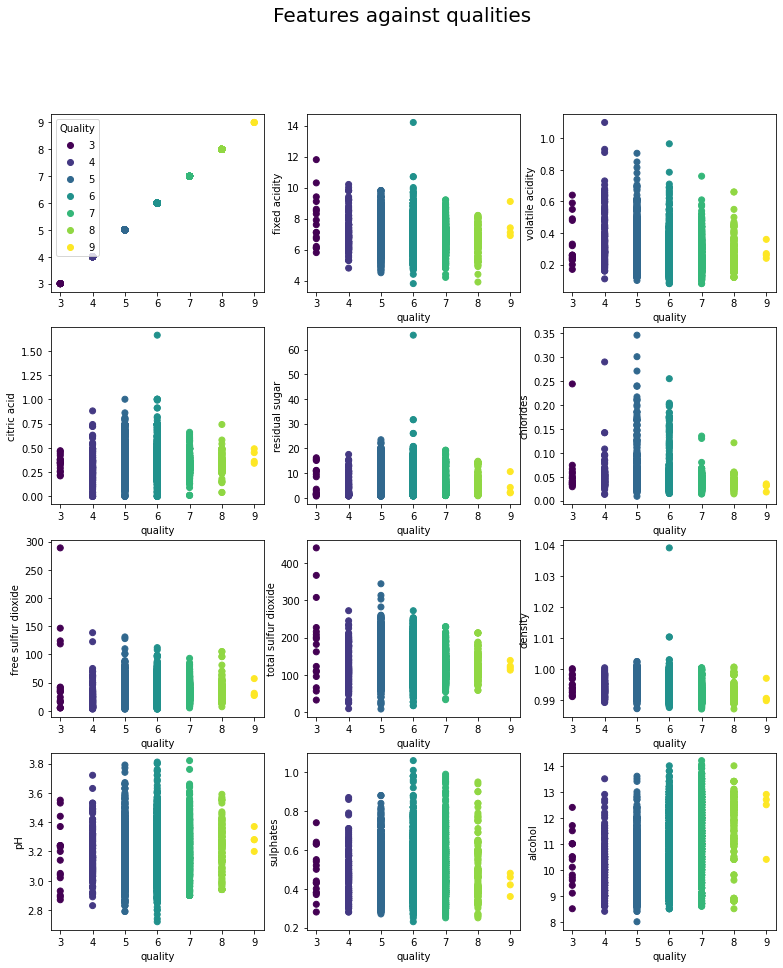

In [7]:
# plotting the columns against the quality to detect ouliers
fig, ((axes1, axes2, axes3), (axes4, axes5, axes6), (axes7, axes8, axes9), (axes10, axes11, axes12)) = plt.subplots(ncols=3, nrows=4, figsize=(13, 15))
fig.suptitle("Features against qualities", size=20)

scatter = axes1.scatter([wine_dataframe.quality], wine_dataframe['quality'], c=wine_dataframe.quality);
#axes1.set(ylabel='fixed acidity', xlabel="quality");
axes1.legend(*scatter.legend_elements(), title='Quality');

axes2.scatter(wine_dataframe.quality, wine_dataframe['fixed acidity'], c=wine_dataframe.quality);
axes2.set(ylabel='fixed acidity', xlabel="quality");

axes3.scatter(wine_dataframe.quality, wine_dataframe['volatile acidity'], c=wine_dataframe.quality);
axes3.set(ylabel='volatile acidity', xlabel="quality");

axes4.scatter(wine_dataframe.quality, wine_dataframe['citric acid'], c=wine_dataframe.quality);
axes4.set(ylabel='citric acid', xlabel="quality");

axes5.scatter(wine_dataframe.quality, wine_dataframe['residual sugar'], c=wine_dataframe.quality);
axes5.set(ylabel='residual sugar', xlabel="quality");

axes6.scatter(wine_dataframe.quality, wine_dataframe['chlorides'], c=wine_dataframe.quality);
axes6.set(ylabel='chlorides', xlabel="quality");

axes7.scatter(wine_dataframe.quality, wine_dataframe['free sulfur dioxide'], c=wine_dataframe.quality);
axes7.set(ylabel='free sulfur dioxide', xlabel="quality");

axes8.scatter(wine_dataframe.quality, wine_dataframe['total sulfur dioxide'], c=wine_dataframe.quality);
axes8.set(ylabel='total sulfur dioxide', xlabel="quality");

axes9.scatter(wine_dataframe.quality, wine_dataframe['density'], c=wine_dataframe.quality);
axes9.set(ylabel='density', xlabel="quality");

axes10.scatter(wine_dataframe.quality, wine_dataframe['pH'], c=wine_dataframe.quality);
axes10.set(ylabel='pH', xlabel="quality");

axes11.scatter(wine_dataframe.quality, wine_dataframe['sulphates'], c=wine_dataframe.quality);
axes11.set(ylabel='sulphates', xlabel="quality");

axes12.scatter(wine_dataframe.quality, wine_dataframe['alcohol'], c=wine_dataframe.quality);
axes12.set(ylabel='alcohol', xlabel="quality");

In [8]:
# function to plot a columns against other columns
def plotcolumns(dataframe:pd.DataFrame, maincolumn:str, othercolumns:list, orientation=0, quality=0) -> None:
    '''
    function that plots a scattered plot of a column passed to "othercolumns" against a list of columns passed to "othercolumns".
    '''
    if orientation == 0:
        dataframe = dataframe[dataframe.quality == quality]
        Y = dataframe[maincolumn]
        n_axis = len(othercolumns)
        if n_axis > 1:
            n_rows = (n_axis//2) + (n_axis%2)
            n_cols = 2
        else:
            n_rows = 1
            n_cols = 1
        fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(13, 4*n_rows))
        fig.suptitle( f"Relationships of {maincolumn} with quality = {quality}", size=20)
        row = 0
        for i, column in enumerate(othercolumns):
            X = dataframe[column]
            axes[row,i%n_cols].scatter(X, Y, c=dataframe.quality);
            axes[row,i%n_cols].set(xlabel=maincolumn, ylabel=othercolumns[i]);
            axes[row,i%n_cols].legend(dataframe.quality.unique(), title="Quality");
            #axes[row,i%n_cols].tick_params(colors='white');
            if i % 2 == 1:
                row += 1
    plt.show()

In [9]:
unique_qualities

array([6., 7., 8., 5., 4., 3., 9.])

In [10]:
# # investigating the effect of fixed acidity 
# for i in range(len(unique_qualities)):
#     plotcolumns(wine_dataframe, 'fixed acidity', ['volatile acidity', 'citric acid', 'pH', "sulphates"], quality=unique_qualities[i]);

In [11]:
# # investigating the effect of fixed acidity 
# for i in range(len(unique_qualities)):
#     plotcolumns(wine_dataframe, 'sulphates', ['chlorides', 'residual sugar', 'free sulfur dioxide', "total sulfur dioxide", 'alcohol', 'density'], quality=unique_qualities[i]);

## Feature Engineering
### Removing outliers

In [12]:
wine_dataframe2 = wine_dataframe
wine_dataframe2 = wine_dataframe2[wine_dataframe2['fixed acidity'] < 13]
wine_dataframe2 = wine_dataframe2[wine_dataframe2['residual sugar'] < 60]
wine_dataframe2 = wine_dataframe2[wine_dataframe2['chlorides'] < 0.3]
wine_dataframe2 = wine_dataframe2[wine_dataframe2['citric acid'] < 1.1]
wine_dataframe2.reset_index(drop=True, inplace=True)
wine_dataframe2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.14,0.34,1.3,0.055,50.0,153.0,0.99450,3.29,0.80,9.6,6.0
1,6.8,0.32,0.32,8.7,0.029,31.0,105.0,0.99146,3.00,0.34,12.3,7.0
2,7.5,0.28,0.34,4.2,0.028,36.0,116.0,0.99100,2.99,0.41,12.3,8.0
3,6.5,0.24,0.32,7.6,0.038,48.0,203.0,0.99580,3.45,0.54,9.7,7.0
4,6.9,0.21,0.62,6.3,0.042,7.0,109.0,0.99358,2.96,0.59,10.2,6.0


In [13]:
wine_dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000
mean,6.855261,0.278129,0.334396,6.453543,0.045880,35.482705,138.786332,0.994053,3.188751,0.490110,10.512357,5.877732
std,0.847440,0.101028,0.120258,5.111890,0.022191,17.151113,42.442138,0.003014,0.150602,0.113939,1.234535,0.885676
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,9.000000,0.987110,2.720000,0.230000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,109.000000,0.991755,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.300000,0.043000,34.000000,134.000000,0.993800,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,10.000000,0.050000,46.000000,168.000000,0.996200,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.060000,14.200000,9.000000


In [14]:
wine_dataframe2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000
mean,6.853018,0.277882,0.333973,6.440212,0.045748,35.482564,138.749038,0.994041,3.188730,0.490017,10.512059,5.878066
std,0.839840,0.100376,0.118461,5.029543,0.021339,17.141864,42.434335,0.002933,0.150598,0.113951,1.234580,0.885993
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,9.000000,0.987110,2.720000,0.230000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,109.000000,0.991753,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.300000,0.043000,34.000000,134.000000,0.993800,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,10.000000,0.050000,46.000000,168.000000,0.996200,3.280000,0.550000,11.400000,6.000000
max,11.800000,1.100000,1.000000,31.600000,0.290000,289.000000,440.000000,1.010300,3.820000,1.060000,14.200000,9.000000


In [15]:
wine_dataframe2.quality.value_counts()

6.0    1865
5.0    1236
7.0     748
8.0     149
4.0     139
3.0      17
9.0       4
Name: quality, dtype: int64

__Performing undersampling of grade 6 samples__

In [16]:
d1 = wine_dataframe2[wine_dataframe2.quality == 6].sample(1237, random_state=10) 
d2 = wine_dataframe2[wine_dataframe2.quality != 6]
d1 = pd.concat([d2, d1]);
d1.reset_index(drop=True, inplace=True);
wine_dataframe3 = d1;
wine_dataframe3.quality.value_counts()

6.0    1237
5.0    1236
7.0     748
8.0     149
4.0     139
3.0      17
9.0       4
Name: quality, dtype: int64

__Performing oversampling on all data__

In [17]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
# Oversampling with randomoversampler
smote = SMOTE(random_state=10, k_neighbors = 3)
x_wine_dataframe, y_wine_dataframe = smote.fit_resample(wine_dataframe3.drop('quality', axis=True), wine_dataframe3.quality)
x_wine_dataframe['quality'] = y_wine_dataframe
wine_dataframe4 = x_wine_dataframe
wine_dataframe4.quality.value_counts()

7.0    1237
8.0    1237
5.0    1237
4.0    1237
3.0    1237
9.0    1237
6.0    1237
Name: quality, dtype: int64

In [18]:
# Oversampling with randomoversampler
rand = RandomOverSampler(random_state=10)
x_wine_dataframe, y_wine_dataframe = rand.fit_resample(wine_dataframe3.drop('quality', axis=True), wine_dataframe3.quality)
x_wine_dataframe['quality'] = y_wine_dataframe
wine_dataframe5 = x_wine_dataframe
wine_dataframe5.quality.value_counts()

7.0    1237
8.0    1237
5.0    1237
4.0    1237
3.0    1237
9.0    1237
6.0    1237
Name: quality, dtype: int64

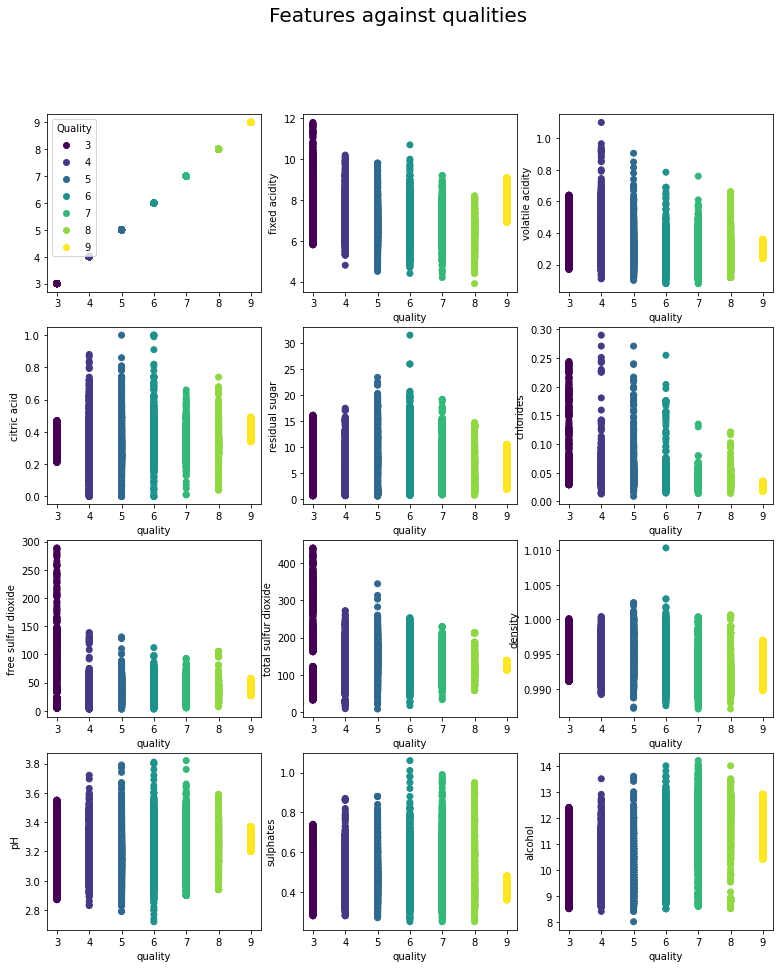

In [19]:
# plotting the columns against the quality for SMOTE ReSampled data
fig, ((axes1, axes2, axes3), (axes4, axes5, axes6), (axes7, axes8, axes9), (axes10, axes11, axes12)) = plt.subplots(ncols=3, nrows=4, figsize=(13, 15))
fig.suptitle("Features against qualities", size=20)
w = wine_dataframe.copy()
wine_dataframe = wine_dataframe4
scatter = axes1.scatter([wine_dataframe.quality], wine_dataframe['quality'], c=wine_dataframe.quality);
#axes1.set(ylabel='fixed acidity', xlabel="quality");
axes1.legend(*scatter.legend_elements(), title='Quality');

axes2.scatter(wine_dataframe.quality, wine_dataframe['fixed acidity'], c=wine_dataframe.quality);
axes2.set(ylabel='fixed acidity', xlabel="quality");

axes3.scatter(wine_dataframe.quality, wine_dataframe['volatile acidity'], c=wine_dataframe.quality);
axes3.set(ylabel='volatile acidity', xlabel="quality");

axes4.scatter(wine_dataframe.quality, wine_dataframe['citric acid'], c=wine_dataframe.quality);
axes4.set(ylabel='citric acid', xlabel="quality");

axes5.scatter(wine_dataframe.quality, wine_dataframe['residual sugar'], c=wine_dataframe.quality);
axes5.set(ylabel='residual sugar', xlabel="quality");

axes6.scatter(wine_dataframe.quality, wine_dataframe['chlorides'], c=wine_dataframe.quality);
axes6.set(ylabel='chlorides', xlabel="quality");

axes7.scatter(wine_dataframe.quality, wine_dataframe['free sulfur dioxide'], c=wine_dataframe.quality);
axes7.set(ylabel='free sulfur dioxide', xlabel="quality");

axes8.scatter(wine_dataframe.quality, wine_dataframe['total sulfur dioxide'], c=wine_dataframe.quality);
axes8.set(ylabel='total sulfur dioxide', xlabel="quality");

axes9.scatter(wine_dataframe.quality, wine_dataframe['density'], c=wine_dataframe.quality);
axes9.set(ylabel='density', xlabel="quality");

axes10.scatter(wine_dataframe.quality, wine_dataframe['pH'], c=wine_dataframe.quality);
axes10.set(ylabel='pH', xlabel="quality");

axes11.scatter(wine_dataframe.quality, wine_dataframe['sulphates'], c=wine_dataframe.quality);
axes11.set(ylabel='sulphates', xlabel="quality");

axes12.scatter(wine_dataframe.quality, wine_dataframe['alcohol'], c=wine_dataframe.quality);
axes12.set(ylabel='alcohol', xlabel="quality");
wine_dataframe = w.copy()

wine_dataset (orignal dataset)

wine_dataset2 (outliers removed)

wine_dataset3 (grade 6 undersampled)

wine_dataset4 (wine_dataset3 oversampled with SMOTE)

wine_dataset5 (wine_dataset3 oversampled with RandomOverSampler)

## Model based exploratory analysis

In [20]:
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression

In [25]:
def fit_test_models(cmodels:dict, rmodels:dict, dataframes:list):
    '''
    test a dataframe against a set of models.
    '''
    # for name, model in cmodels.items():
    #     for i, dataframe in enumerate(dataframes):
    #         x_train, x_test, y_train, y_test = train_test_split(dataframe.drop('quality', axis=1), dataframe.quality, test_size=0.15,random_state=10);
    #         score = model.fit(x_train, y_train);
    #         model = model.fit(x_train, y_train);
    #         y_preds = model.predict(x_test);
    #         print("Model: ", name, " dataset: ", i);
    #         print(classification_report(y_test, y_preds));
    for name, model in rmodels.items():
        for i, dataframe in enumerate(dataframes):
            x_train, x_test, y_train, y_test = train_test_split(dataframe.drop('quality', axis=1), dataframe.quality, test_size=0.15,random_state=10);
            score = model.fit(x_train, y_train);
            model = model.fit(x_train, y_train);
            y_preds = model.predict(x_test);
            y_preds = y_preds.round()
            print("Model: ", name, " dataset: ", i);
            print(classification_report(y_test, y_preds));

In [28]:
# fit_test_models({"Random forest classifier":RandomForestClassifier(random_state=10),
# "Linear SVC": LinearSVC(random_state=10),
# "Kneighbors classifier": KNeighborsClassifier(),
# "Logistic regrssor": LogisticRegression(random_state=10)},
# {"Random forest regressor": RandomForestRegressor(random_state=10),
# "Linear SVR": LinearSVR(random_state=10),
# "Kneighbors Regressor": KNeighborsRegressor(),}, [wine_dataframe, wine_dataframe2, wine_dataframe3, wine_dataframe4, wine_dataframe5])

In [38]:
model = RandomForestClassifier(random_state=10)
x_train, x_test, y_train, y_test = train_test_split(wine_dataframe4.drop('quality', axis=1), wine_dataframe4.quality, test_size=0.15,random_state=10);
score = model.fit(x_train, y_train);
y_preds = model.predict(x_test);
print(classification_report(y_test, y_preds));


              precision    recall  f1-score   support

         3.0       0.97      1.00      0.98       188
         4.0       0.87      0.96      0.91       189
         5.0       0.71      0.66      0.68       207
         6.0       0.57      0.52      0.54       174
         7.0       0.79      0.81      0.80       182
         8.0       0.94      0.94      0.94       185
         9.0       0.99      1.00      1.00       174

    accuracy                           0.84      1299
   macro avg       0.83      0.84      0.84      1299
weighted avg       0.83      0.84      0.84      1299



In [39]:
y_preds = model.predict(pd.read_csv("../data/wine-testing-data.csv").values)
print(classification_report(pd.read_csv("../data/wine-quality.csv").values, y_preds));

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         3
         4.0       0.29      0.67      0.40        24
         5.0       0.64      0.64      0.64       219
         6.0       0.68      0.52      0.59       330
         7.0       0.52      0.68      0.59       132
         8.0       0.37      0.42      0.39        26
         9.0       0.00      0.00      0.00         1

    accuracy                           0.58       735
   macro avg       0.36      0.42      0.37       735
weighted avg       0.61      0.58      0.59       735



C:\Users\Ephraim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Ephraim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ephraim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ephraim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics

<AxesSubplot:>

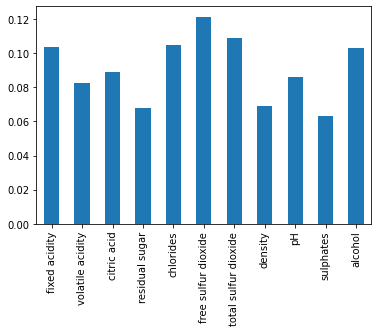

In [44]:
f = pd.Series(model.feature_importances_, index=model.feature_names_in_)
fig, ax = plt.subplots()
f.plot.bar(ax=ax )

In [29]:
wine_dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.14,0.34,1.3,0.055,50.0,153.0,0.99450,3.29,0.80,9.6,6.0
1,6.8,0.32,0.32,8.7,0.029,31.0,105.0,0.99146,3.00,0.34,12.3,7.0
2,7.5,0.28,0.34,4.2,0.028,36.0,116.0,0.99100,2.99,0.41,12.3,8.0
3,6.5,0.24,0.32,7.6,0.038,48.0,203.0,0.99580,3.45,0.54,9.7,7.0
4,6.9,0.21,0.62,6.3,0.042,7.0,109.0,0.99358,2.96,0.59,10.2,6.0


In [49]:
wine_dataframe2.quality.value_counts()

6.0    1865
5.0    1236
7.0     748
8.0     149
4.0     139
3.0      17
9.0       4
Name: quality, dtype: int64

In [602]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score

In [99]:
def preprocess1(dataframe):
    return dataframe[(dataframe.quality == 5) | (dataframe.quality ==6) | (dataframe.quality ==7)]

wine_dataframe21 = preprocess1(wine_dataframe2)
wine_dataframe21.quality.value_counts()


6.0    1865
5.0    1236
7.0     748
Name: quality, dtype: int64

In [100]:
wine_dataframe21.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.14,0.34,1.3,0.055,50.0,153.0,0.99450,3.29,0.80,9.6,6.0
1,6.8,0.32,0.32,8.7,0.029,31.0,105.0,0.99146,3.00,0.34,12.3,7.0
3,6.5,0.24,0.32,7.6,0.038,48.0,203.0,0.99580,3.45,0.54,9.7,7.0
4,6.9,0.21,0.62,6.3,0.042,7.0,109.0,0.99358,2.96,0.59,10.2,6.0
5,6.4,0.16,0.42,1.0,0.036,29.0,113.0,0.99080,3.18,0.52,11.0,6.0


In [106]:
model = SVC(random_state=10)
x_train, x_test, y_train, y_test = train_test_split(wine_dataframe21.drop('quality', axis=1), wine_dataframe21.quality, test_size=0.15,random_state=10);
score = model.fit(x_train, y_train);
y_preds = model.predict(x_test);
print(classification_report(y_test, y_preds));

              precision    recall  f1-score   support

         5.0       0.45      0.05      0.10       188
         6.0       0.49      0.96      0.65       283
         7.0       0.00      0.00      0.00       107

    accuracy                           0.49       578
   macro avg       0.31      0.34      0.25       578
weighted avg       0.39      0.49      0.35       578



C:\Users\Ephraim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ephraim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ephraim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [107]:
testing_data = pd.concat([pd.read_csv("../data/wine-testing-data.csv"), pd.read_csv("../data/wine-quality.csv")], axis=1)
testing_data = preprocess1(testing_data)
X = testing_data.drop("quality", axis=1)
y = testing_data.quality
y_test_preds = model.predict(X)
print(classification_report(y, y_test_preds));

              precision    recall  f1-score   support

         5.0       0.43      0.04      0.07       219
         6.0       0.48      0.97      0.65       330
         7.0       0.00      0.00      0.00       132

    accuracy                           0.48       681
   macro avg       0.30      0.34      0.24       681
weighted avg       0.37      0.48      0.34       681



C:\Users\Ephraim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ephraim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ephraim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [613]:
scaler = MinMaxScaler()
def preprocess2(X, test=False):
    if test:
        return scaler.transform(X)
    else:
        return scaler.fit_transform(X)

In [109]:
model = SVC(random_state=10)
x_train, x_test, y_train, y_test = train_test_split(wine_dataframe21.drop('quality', axis=1), wine_dataframe21.quality, test_size=0.15,random_state=10);
x_train = preprocess2(x_train)
x_test = preprocess2(x_test)
score = model.fit(x_train, y_train);
y_preds = model.predict(x_test);
print(classification_report(y_test, y_preds));

              precision    recall  f1-score   support

         5.0       0.60      0.71      0.65       188
         6.0       0.57      0.65      0.61       283
         7.0       0.52      0.14      0.22       107

    accuracy                           0.58       578
   macro avg       0.56      0.50      0.49       578
weighted avg       0.57      0.58      0.55       578



In [110]:
testing_data = pd.concat([pd.read_csv("../data/wine-testing-data.csv"), pd.read_csv("../data/wine-quality.csv")], axis=1)
testing_data = preprocess1(testing_data)
X = testing_data.drop("quality", axis=1)
y = testing_data.quality
X = preprocess2(X)
y_test_preds = model.predict(X)
print(classification_report(y, y_test_preds));

              precision    recall  f1-score   support

         5.0       0.55      0.70      0.62       219
         6.0       0.54      0.61      0.58       330
         7.0       0.59      0.13      0.21       132

    accuracy                           0.55       681
   macro avg       0.56      0.48      0.47       681
weighted avg       0.55      0.55      0.52       681



## Categorising data into common and less common

In [114]:
wine_dataframe22 = wine_dataframe2.copy()
wine_dataframe22["common"] = (wine_dataframe22.quality == 5)|(wine_dataframe22.quality==6)|(wine_dataframe22.quality == 7)
wine_dataframe22.drop("quality", axis=1, inplace=True)
wine_dataframe22.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,common
0,7.5,0.14,0.34,1.3,0.055,50.0,153.0,0.99450,3.29,0.80,9.6,True
1,6.8,0.32,0.32,8.7,0.029,31.0,105.0,0.99146,3.00,0.34,12.3,True
2,7.5,0.28,0.34,4.2,0.028,36.0,116.0,0.99100,2.99,0.41,12.3,False
3,6.5,0.24,0.32,7.6,0.038,48.0,203.0,0.99580,3.45,0.54,9.7,True
4,6.9,0.21,0.62,6.3,0.042,7.0,109.0,0.99358,2.96,0.59,10.2,True


In [116]:
wine_dataframe22.common.value_counts()

True     3849
False     309
Name: common, dtype: int64

In [199]:
wine_dataframe22 = wine_dataframe2.copy()
wine_dataframe22["common"] = (wine_dataframe22.quality == 5)|(wine_dataframe22.quality==6)|(wine_dataframe22.quality == 7)
wine_dataframe22.drop("quality", axis=1, inplace=True)

smote = SMOTE(random_state=10)
x_wine_dataframe, y_wine_dataframe = smote.fit_resample(wine_dataframe22.drop('common', axis=True), wine_dataframe22.common)
x_wine_dataframe['common'] = y_wine_dataframe
wine_dataframe22 = x_wine_dataframe
wine_dataframe22.common.value_counts()

True     3849
False    3849
Name: common, dtype: int64

In [200]:
model = LogisticRegression(random_state=10)
x_train, x_test, y_train, y_test = train_test_split(wine_dataframe22.drop('common', axis=1), wine_dataframe22.common, test_size=0.15,random_state=10);
x_train = preprocess2(x_train)
x_test = preprocess2(x_test)
score = model.fit(x_train, y_train);
y_preds = model.predict(x_test);
print(classification_report(y_test, y_preds));

              precision    recall  f1-score   support

       False       0.61      0.71      0.66       549
        True       0.69      0.59      0.64       606

    accuracy                           0.65      1155
   macro avg       0.65      0.65      0.65      1155
weighted avg       0.65      0.65      0.65      1155



In [201]:
testing_data = pd.concat([pd.read_csv("../data/wine-testing-data.csv"), pd.read_csv("../data/wine-quality.csv")], axis=1)
testing_data["common"] = (testing_data.quality == 5)|(testing_data.quality==6)|(testing_data.quality == 7)
testing_data.drop("quality", axis=1, inplace=True)
X = testing_data.drop("common", axis=1)
y = testing_data.common
X = preprocess2(X)
y_test_preds = model.predict(X)
print(classification_report(y, y_test_preds));

              precision    recall  f1-score   support

       False       0.09      0.74      0.16        54
        True       0.95      0.40      0.57       681

    accuracy                           0.43       735
   macro avg       0.52      0.57      0.36       735
weighted avg       0.89      0.43      0.54       735



In [146]:
model.coef_

array([[-1.34148030e-01, -3.38798782e+00,  1.84289341e+00,
         5.06866486e-02, -6.00503290e-02, -3.60280210e-03,
         2.21230350e-03,  7.26382730e-01,  1.95697837e-01,
         5.62732382e-01, -1.42993807e-01]])

## Features crossing

In [614]:
wine_dataframe2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.14,0.34,1.3,0.055,50.0,153.0,0.99450,3.29,0.80,9.6,6.0
1,6.8,0.32,0.32,8.7,0.029,31.0,105.0,0.99146,3.00,0.34,12.3,7.0
2,7.5,0.28,0.34,4.2,0.028,36.0,116.0,0.99100,2.99,0.41,12.3,8.0
3,6.5,0.24,0.32,7.6,0.038,48.0,203.0,0.99580,3.45,0.54,9.7,7.0
4,6.9,0.21,0.62,6.3,0.042,7.0,109.0,0.99358,2.96,0.59,10.2,6.0


In [615]:
wine_dataframe23 = wine_dataframe2.copy()
def preprocess3d(dataframe):
    dataframe["alcohol_sugar"] = dataframe["density"]/dataframe['alcohol']
    dataframe.drop("sulphates",axis=1, inplace=True)
    dataframe.drop("density",axis=1, inplace=True)
    dataframe.drop("chlorides",axis=1, inplace=True)
    pass

preprocess3d(wine_dataframe23)
wine_dataframe23.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,alcohol,quality,alcohol_sugar
0,7.5,0.14,0.34,1.3,50.0,153.0,3.29,9.6,6.0,0.103594
1,6.8,0.32,0.32,8.7,31.0,105.0,3.00,12.3,7.0,0.080607
2,7.5,0.28,0.34,4.2,36.0,116.0,2.99,12.3,8.0,0.080569
3,6.5,0.24,0.32,7.6,48.0,203.0,3.45,9.7,7.0,0.102660
4,6.9,0.21,0.62,6.3,7.0,109.0,2.96,10.2,6.0,0.097410


In [616]:
wine_dataframe23.groupby("quality").median()

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,alcohol,alcohol_sugar
quality,,,,,,,,,
3.0,7.60,0.260,0.350,3.5,34.0,182.0,3.20,10.5,0.094957
4.0,6.90,0.340,0.290,2.4,18.0,119.0,3.16,10.0,0.099320
5.0,6.80,0.290,0.320,7.2,36.0,153.0,3.16,9.5,0.104632
6.0,6.80,0.250,0.320,5.4,34.0,132.0,3.18,10.5,0.094853
7.0,6.70,0.250,0.310,3.6,33.0,123.5,3.20,11.4,0.087009
8.0,6.70,0.260,0.320,4.3,35.0,122.0,3.24,12.0,0.082932
9.0,7.25,0.265,0.405,3.2,29.5,121.5,3.28,12.6,0.078591


In [760]:
wine_dataframe231 = wine_dataframe23.copy()
wine_dataframe231["common"] = (wine_dataframe231.quality == 5)|(wine_dataframe231.quality==6)|(wine_dataframe231.quality == 7)
wine_dataframe231.drop("quality", axis=1, inplace=True)

smote = SMOTE(random_state=10)
x_wine_dataframe, y_wine_dataframe = smote.fit_resample(wine_dataframe231.drop('common', axis=True), wine_dataframe231.common)
x_wine_dataframe['common'] = y_wine_dataframe
wine_dataframe231 = x_wine_dataframe

model = LinearSVC(C=4, loss="hinge", random_state=10)
x_train, x_test, y_train, y_test = train_test_split(wine_dataframe231.drop('common', axis=1), wine_dataframe231.common, test_size=0.15,random_state=10);
x_train = preprocess2(x_train)
x_test = preprocess2(x_test)
score = model.fit(x_train, y_train)
y_preds = model.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       False       0.65      0.61      0.63       549
        True       0.67      0.71      0.69       606

    accuracy                           0.66      1155
   macro avg       0.66      0.66      0.66      1155
weighted avg       0.66      0.66      0.66      1155



C:\Users\Ephraim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [762]:
testing_data = pd.concat([pd.read_csv("../data/wine-testing-data.csv"), pd.read_csv("../data/wine-quality.csv")], axis=1)
preprocess3d(testing_data)
testing_data["common"] = (testing_data.quality == 5)|(testing_data.quality==6)|(testing_data.quality == 7)
testing_data.drop("quality", axis=1, inplace=True)
X = testing_data.drop("common", axis=1)
y = testing_data.common
X = preprocess2(X, True)
y_test_preds = model.predict(X)
print(classification_report(y, y_test_preds));

              precision    recall  f1-score   support

       False       0.13      0.59      0.22        54
        True       0.96      0.69      0.80       681

    accuracy                           0.68       735
   macro avg       0.54      0.64      0.51       735
weighted avg       0.89      0.68      0.76       735



In [763]:
roc_auc_score(y, y_test_preds)

0.6413770598792625

<AxesSubplot:>

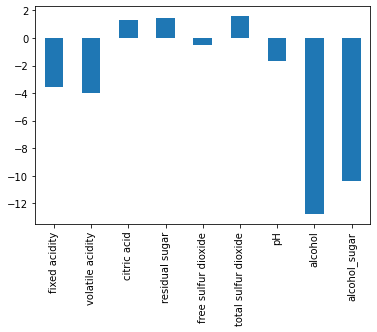

In [764]:
pd.Series(model.coef_[0], index=wine_dataframe231.drop("common", axis=1).columns).plot.bar()

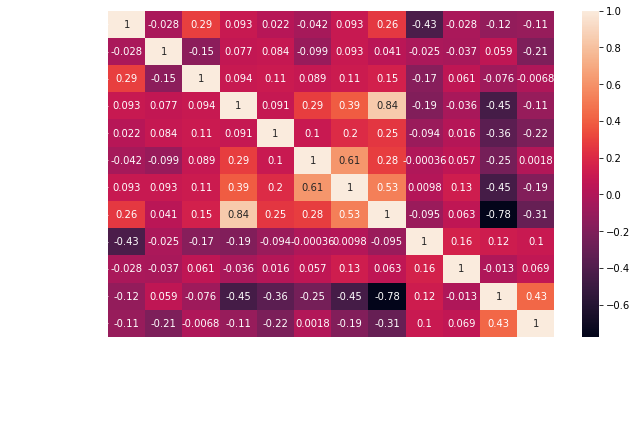

In [560]:
import seaborn as sns
fig, axes = plt.subplots(figsize=(10, 6))
sns.heatmap(wine_dataframe.corr(),annot=True, ax=axes)
axes.tick_params(colors="white")

## Model tuning (SVC, LinearSVC, LogisticRegressor)

In [634]:
wine_dataframe4 = wine_dataframe231.copy()
wine_dataframe4["common"]

In [ ]:
param = {
    "penalty": ["l1", "l2"],
    "loss": ["hinge", "squared_hinge"],
    "dual": [True, False],
    "C": [i for i in range(1,5, 1)]
}
gridmodel = GridSearchCV(estimator=LinearSVC(random_state=10))
gridmodel.fi

In [746]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [699]:
a1 = LinearSVC(random_state=10).fit(x_train, y_train)
a2 = SVC(random_state=10).fit(x_train, y_train)
a3 = LogisticRegression(random_state=10).fit(x_train, y_train)

In [706]:
_model1_fits = a1.predict(x_train)
_model2_fits = a2.predict(x_train)
_model3_fits = a3.predict(x_train)

In [727]:
(np.zeros(3)+np.ones(3)+np.zeros(3)) == 0

array([False, False, False])

In [708]:
len(_model1_fits), len(y_train)

(6543, 6543)

In [717]:
atotal = np.array([_model1_fits, _model2_fits, _model3_fits]).T
pd.DataFrame(atotal)

,0,1,2
0,False,False,False
1,True,False,True
2,True,True,True
3,False,False,False
4,True,True,True
...,...,...,...
6538,True,True,True
6539,False,False,True
6540,False,False,False
6541,False,False,False
